# Food Retail in Philadelphia 
## Deja McCauley
### UP221 GIS Midterm
#### This notebook will explore Philadelphias access to low produce and high produce supply stores
##### Research Question: what community needs emerge as a priority for North Philadelphia’s Logan neighborhood when using indicators (race, unemployment, food accessibility, open space access, and housing) to compare the area to the city as a whole?
##### Data Sources: Open Data Philly 

In [3]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(
    'data/NeighborhoodFoodRetail.csv',
    dtype= 
    {
        'GEOID10':str
        
    }
)

In [5]:
df.head(1)

OBJECTID       GEOID10 NON_RESIDENTIAL  TOTAL_LPSS  LPSS_PER1000  \
0         1  421010108001              No        25.0     30.674847   

   TOTAL_HPSS  HPSS_PER1000  PCT_HPSS              HPSS_ACCESS  \
0         2.5      3.067485  9.090909  Moderate or High Access   

  SUPERMARKET_ACCESS  PCT_VEHICLE_AVAILABILITY  TOTAL_RESTAURANTS  \
0                Yes                 44.268775                  0   

   PCT_POVERTY HIGH_POVERTY    Shape__Area  Shape__Length  
0    54.969325          Yes  275942.097656    3260.316044

In [6]:
df.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OBJECTID                  1336 non-null   int64  
 1   GEOID10                   1336 non-null   object 
 2   NON_RESIDENTIAL           1336 non-null   object 
 3   TOTAL_LPSS                1325 non-null   float64
 4   LPSS_PER1000              1325 non-null   float64
 5   TOTAL_HPSS                1325 non-null   float64
 6   HPSS_PER1000              1325 non-null   float64
 7   PCT_HPSS                  1325 non-null   float64
 8   HPSS_ACCESS               1325 non-null   object 
 9   SUPERMARKET_ACCESS        1325 non-null   object 
 10  PCT_VEHICLE_AVAILABILITY  1326 non-null   float64
 11  TOTAL_RESTAURANTS         1336 non-null   int64  
 12  PCT_POVERTY               1327 non-null   float64
 13  HIGH_POVERTY              1327 non-null   object 
 14  Shape__A

In [7]:
#define columns to keep
columns_to_keep=['GEOID10',
                 'TOTAL_LPSS',
                 'LPSS_PER1000',
                 'TOTAL_HPSS',
                 'HPSS_PER1000',
                 'PCT_HPSS',
                 'PCT_VEHICLE_AVAILABILITY',
                 'TOTAL_RESTAURANTS',
                 'PCT_POVERTY',
                 'Shape__Area',
                 'Shape__Length',]
                 
#add it to a new dataframe
df2=df[columns_to_keep]

In [8]:
#look at columns in new dataframe, same as df.columns.to_list
columns=list(df2)
columns

['GEOID10',
 'TOTAL_LPSS',
 'LPSS_PER1000',
 'TOTAL_HPSS',
 'HPSS_PER1000',
 'PCT_HPSS',
 'PCT_VEHICLE_AVAILABILITY',
 'TOTAL_RESTAURANTS',
 'PCT_POVERTY',
 'Shape__Area',
 'Shape__Length']

In [9]:
df2.columns=['FIPS',
             'Total Low Produce Supply',
             'Low Produce Supply Per 1000',
             'Total High Produce Supply',
             'High Produce Supply Per 1000',
             'Percent High Produce Supply',
             'Percent Vehicle Availability',
             'Total Restaurants',
             'Percent Poverty',
             'Shape Area',
             'Shape length']
       

In [10]:
df2.sample(5)

FIPS  Total Low Produce Supply  Low Produce Supply Per 1000  \
130   421010163004                      66.0                    61.452514   
1052  421010071011                      29.0                    27.153558   
3     421010110002                      15.0                    19.480519   
1211  421010252007                      12.0                    10.535558   
211   421010025002                      26.0                    27.455121   

      Total High Produce Supply  High Produce Supply Per 1000  \
130                        4.75                      4.422719   
1052                       3.75                      3.511236   
3                          2.75                      3.571429   
1211                       2.00                      1.755926   
211                        5.25                      5.543823   

      Percent High Produce Supply  Percent Vehicle Availability  \
130                      6.713781                     47.105263   
1052                    11.450382                     66.101695   
3                       15.492958                     52.824859   
1211                    14.285714                     40.441176   
211                     16.800000                     98.062954   

      Total Restaurants  Percent Poverty     Shape Area  Shape length  
130                   2        53.817505  394579.914062   2884.435494  
1052                  0        31.086142  117242.699219   1390.427895  
3                     0        19.480519  185771.992188   2057.362419  
1211                  2        11.940299  220032.453125   1957.973398  
211                   5         2.217529  166991.769531   2362.380496

In [11]:
# accessing a single column, percent hpss
df2['Percent High Produce Supply'].head()

0     9.090909
1     7.692308
2     6.666667
3    15.492958
4    12.820513
Name: Percent High Produce Supply, dtype: float64

In [12]:
df2['Percent High Produce Supply'].mean() #11.8% people in philly have access to high produce 

11.8199793737283

In [13]:
df2['Percent High Produce Supply'].describe()

count    1325.000000
mean       11.819979
std         9.602760
min         0.000000
25%         5.555556
50%         9.677419
75%        15.789474
max        80.952381
Name: Percent High Produce Supply, dtype: float64

<AxesSubplot: ylabel='Frequency'>

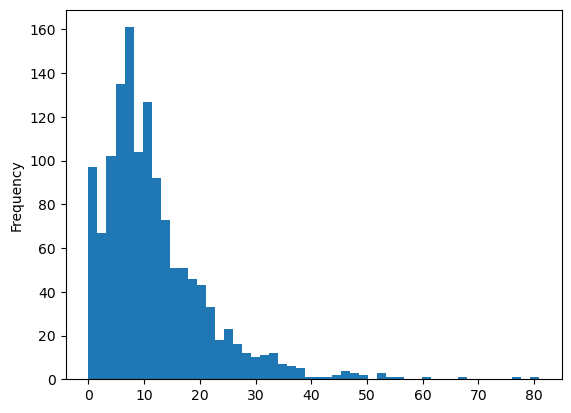

In [14]:
#shows percent of people that have access to high produce supply in Philly
df2['Percent High Produce Supply'].plot.hist(bins=50) 

<AxesSubplot: xlabel='Total Low Produce Supply', ylabel='Total High Produce Supply'>

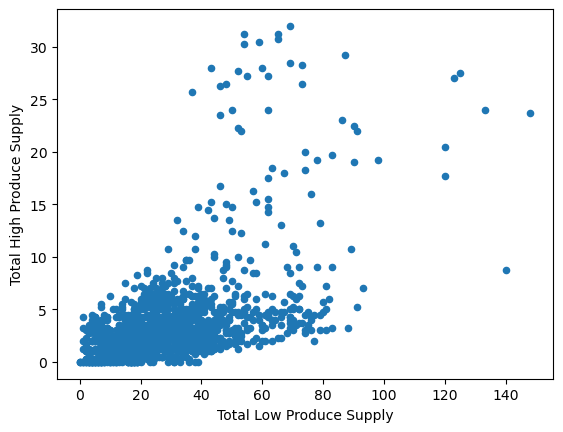

In [15]:
df2.plot.scatter(x='Total Low Produce Supply',y='Total High Produce Supply')

/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: title={'center': 'Total Number of High and Low Produce Supply Stores in Philadelphia, 2019'}, xlabel='Total Low Produce Supply', ylabel='Total High Produce Supply'>

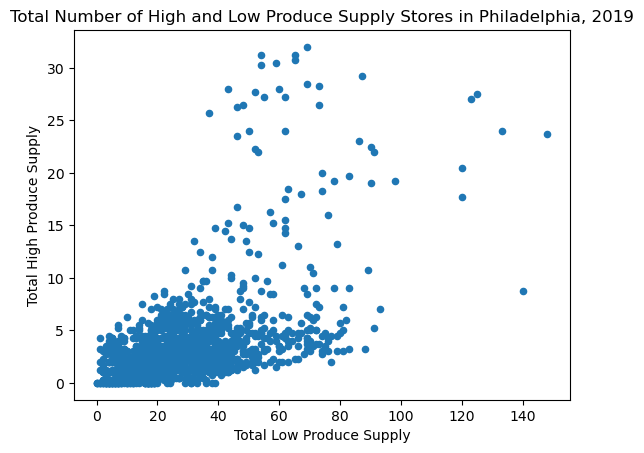

In [16]:
df2.plot.scatter(x='Total Low Produce Supply',
                             y= 'Total High Produce Supply',
                             title= 'Total Number of High and Low Produce Supply Stores in Philadelphia, 2019',
                             cmap= 'GnBu')

In [17]:
#read in a gejson file downloaded from the philly open data portal census block data 
blocks=gpd.read_file('data/Census_Block_Groups_2010.geojson')
blocks.head()

OBJECTID STATEFP10 COUNTYFP10 TRACTCE10 BLKGRPCE10       GEOID10  \
0         1        42        101    010800          1  421010108001   
1         2        42        101    010800          2  421010108002   
2         3        42        101    010900          2  421010109002   
3         4        42        101    011000          2  421010110002   
4         5        42        101    011000          1  421010110001   

      NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  AWATER10   INTPTLAT10  \
0  Block Group 1   G5030          S   161887         0  +39.9687580   
1  Block Group 2   G5030          S   103778         0  +39.9665475   
2  Block Group 2   G5030          S    43724         0  +39.9642929   
3  Block Group 2   G5030          S   108966         0  +39.9753585   
4  Block Group 1   G5030          S   142244         0  +39.9724202   

     INTPTLON10   Shape__Area  Shape__Length  \
0  -075.1997251  1.742508e+06    8200.327170   
1  -075.2004455  1.117026e+06    4364.980144   
2  -075.1896435  4.706347e+05    3048.109084   
3  -075.2113476  1.172871e+06    5169.004282   
4  -075.2051689  1.531076e+06   10476.574129   

                                            geometry  
0  POLYGON ((-75.19851 39.96945, -75.19744 39.969...  
1  POLYGON ((-75.19783 39.96571, -75.20006 39.965...  
2  POLYGON ((-75.18766 39.96450, -75.18755 39.963...  
3  POLYGON ((-75.20984 39.97351, -75.21221 39.973...  
4  POLYGON ((-75.19855 39.97330, -75.19854 39.973...

<AxesSubplot: >

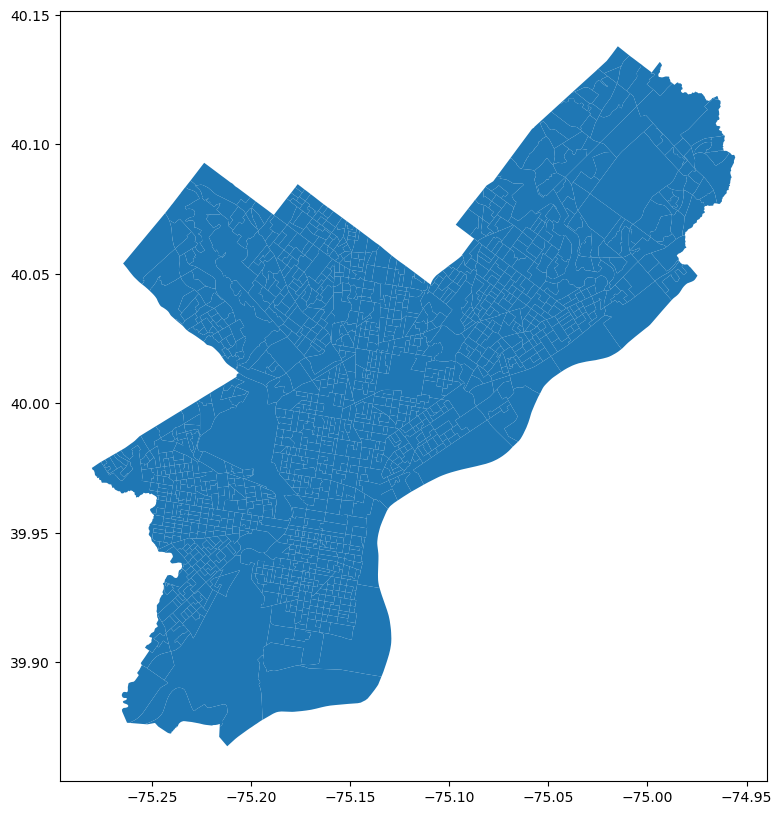

In [18]:
blocks.plot(figsize=(12,10)) #plot blocks

In [19]:
#more about the data 
blocks.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       1336 non-null   int64   
 1   STATEFP10      1336 non-null   object  
 2   COUNTYFP10     1336 non-null   object  
 3   TRACTCE10      1336 non-null   object  
 4   BLKGRPCE10     1336 non-null   object  
 5   GEOID10        1336 non-null   object  
 6   NAMELSAD10     1336 non-null   object  
 7   MTFCC10        1336 non-null   object  
 8   FUNCSTAT10     1336 non-null   object  
 9   ALAND10        1336 non-null   int64   
 10  AWATER10       1336 non-null   int64   
 11  INTPTLAT10     1336 non-null   object  
 12  INTPTLON10     1336 non-null   object  
 13  Shape__Area    1336 non-null   float64 
 14  Shape__Length  1336 non-null   float64 
 15  geometry       1336 non-null   geometry
dtypes: float64(2), geometry(1), int64(3), object(10)
memory usage: 167.1+ 

In [20]:
#subset the data for FIPS and geometry 
blocks=blocks[['GEOID10','geometry']]

In [21]:
blocks.head()

GEOID10                                           geometry
0  421010108001  POLYGON ((-75.19851 39.96945, -75.19744 39.969...
1  421010108002  POLYGON ((-75.19783 39.96571, -75.20006 39.965...
2  421010109002  POLYGON ((-75.18766 39.96450, -75.18755 39.963...
3  421010110002  POLYGON ((-75.20984 39.97351, -75.21221 39.973...
4  421010110001  POLYGON ((-75.19855 39.97330, -75.19854 39.973...

In [22]:
columns=list(blocks)
columns

['GEOID10', 'geometry']

In [23]:
blocks.columns=['FIPS',
                'geometry']

In [24]:
#create a new datafram based on join to merge food retail and block data to create a map 
blocks_food=blocks.merge(df2,on="FIPS")

<AxesSubplot: >

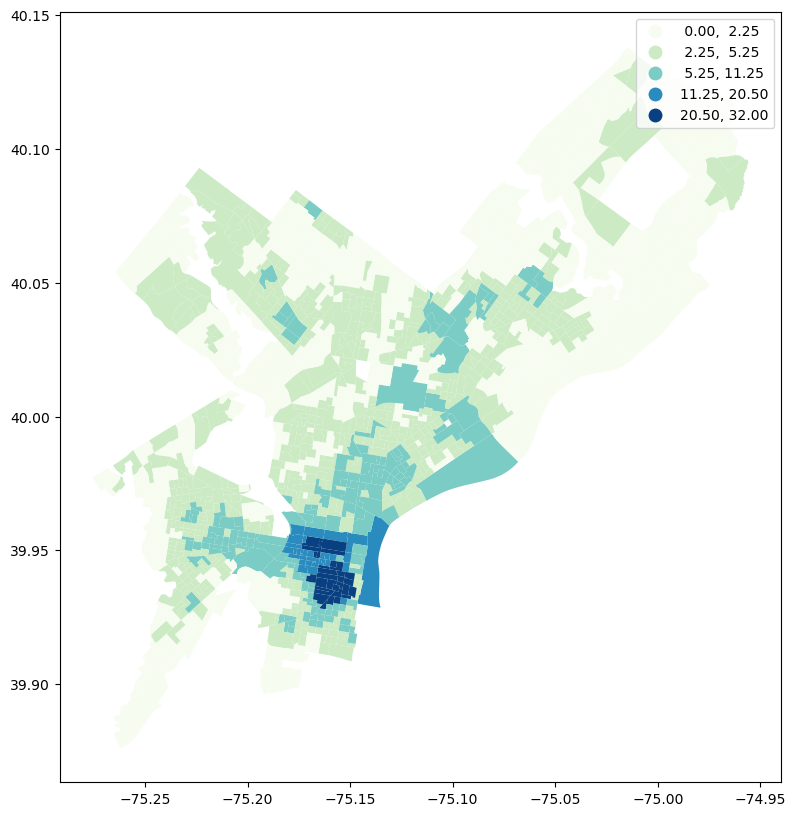

In [25]:
#simple plot creation with newly joined data 
blocks_food.plot(figsize=(12,10),
                  column='Total High Produce Supply',
                  legend=True,
                  cmap= 'GnBu',
                  scheme='NaturalBreaks')



<AxesSubplot: >

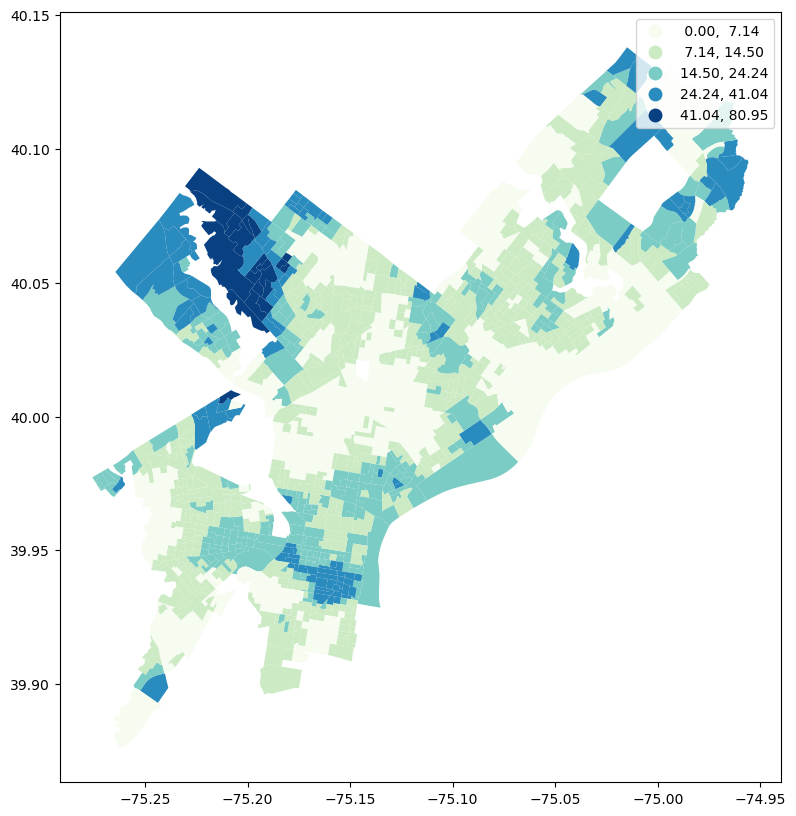

In [26]:
#simple plot creation with newly joined data 
blocks_food.plot(figsize=(12,10),
                  column='Percent High Produce Supply',
                  legend=True,
                  cmap= 'GnBu',
                  scheme='NaturalBreaks')




<AxesSubplot: >

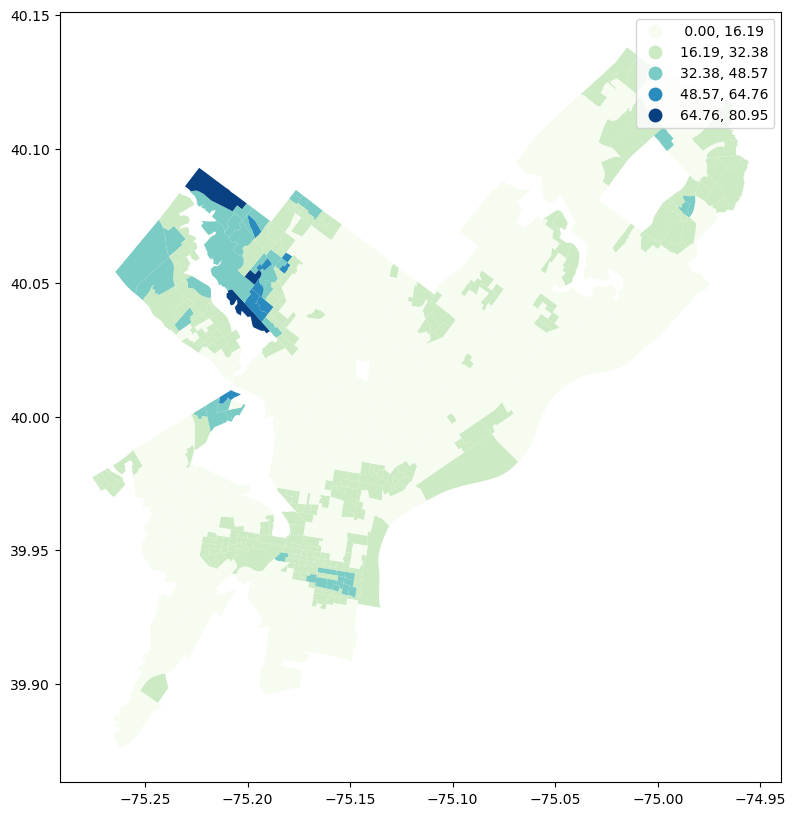

In [27]:
#simple plot creation with newly joined data 
blocks_food.plot(figsize=(12,10),
                  column='Percent High Produce Supply',
                  legend=True,
                  cmap= 'GnBu',
                  scheme='equal_interval')

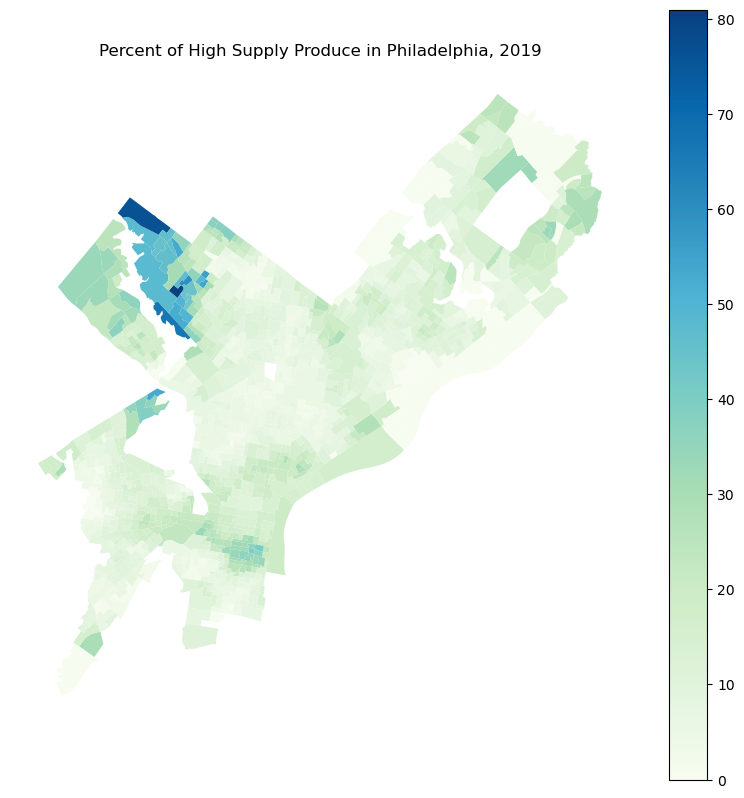

In [29]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
blocks_food.plot(ax=ax,
         column='Percent High Produce Supply',
         cmap='GnBu',
         legend=True,)
        

# add a title
ax.set_title('Percent of High Supply Produce in Philadelphia, 2019')

# get rid of the axis
ax.axis('off');

#### Group Members: Deja McCauley, Olivia Arena, Lindsey Morris, Cassie Truong
#### My role for this project includes data analysis and visualization for Philadelphia and Logan Unemployment and Food Retail data